In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
seed = 739

# Обработка данных

## Загрузка данных

In [5]:
train_df = pd.read_csv('data/train.csv', delimiter=',')
# cntrbtrs = pd.read_csv('data/cntrbtrs.csv', delimiter=';')
# trnsctns = pd.read_csv('data/trnsctns.csv', delimiter=';')

In [64]:
years = sorted(train_df["year"].unique())
churn_average = train_df.groupby("year")["churn"].sum().values
users_per_year = train_df.groupby("year")["churn"].count().values

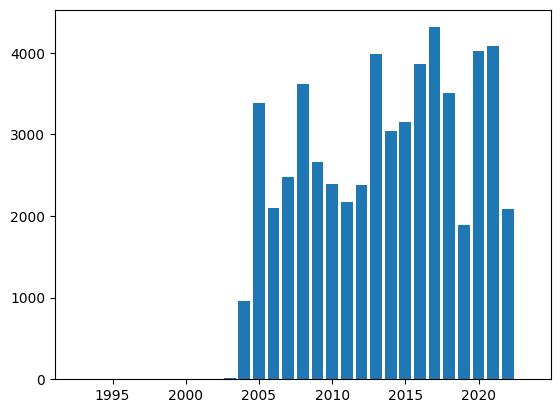

In [65]:
plt.bar(x=years, height=churn_average)
plt.show()


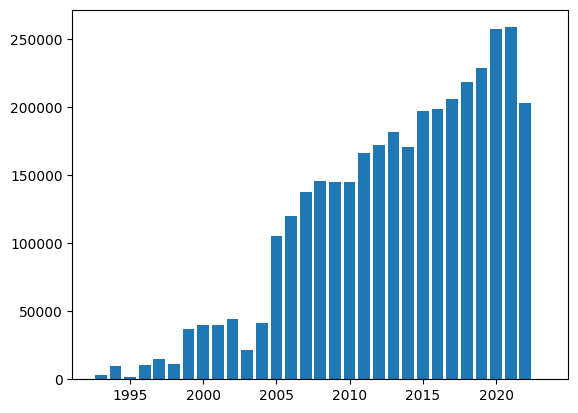

In [70]:
plt.bar(x=years, height=(users_per_year - churn_average))
plt.show()

In [5]:
from IPython.display import display

display(train_df.head(7).T)
# display(trnsctns.head(7))
# display(cntrbtrs.head(7))

,0,1,2,3,4,5,6
slctn_nmbr,1,0,2,0,0,1,0
client_id,0xA095932790098744A2325A8D152C05C7,0xF75BAA20A603A2479005DEB80464336E,0x0D18081E0556AF4F95A931FBA4159D52,0x0AD72BC5475D9A4D83E12350A84F839D,0x73DF06339CC25840838408BAD52BE223,0x092BC8229C2770459A87E35C754892E0,0x4768BFF110D93941963C2379F667A77E
npo_account_id,0xD4DBBAC6561929409BA45725A220613E,0x3DCFF11974B3D8458CE3569DE9E855D5,0x9DADF88CB3407C4E89403315F640393E,0xF59C4E62F115684899EAE9B5D5ECF70F,0x35BFFA05321C014B9FC29A189E89EDF0,0x55B01C14C2640948A54F2F3A0FB715A1,0x36C2EC983556E443817033C4032D7BA8
npo_accnts_nmbr,1,2,1,1,2,1,1
pmnts_type,2,2,1,1,2,2,2
year,2017,2009,2010,2005,2007,2007,2004
quarter,2017Q4,2009Q1,2010Q1,2005Q4,2007Q4,2007Q3,2004Q4
gender,1,1,1,-1,1,-1,-1
age,48,35,47,42,42,50,29
clnt_cprtn_time_d,8091,3303,1163,47,876,3536,2031


## Просмотр данных

In [6]:
display(train_df.info())
# display(trnsctns.info())
# display(cntrbtrs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589918 entries, 0 to 3589917
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   slctn_nmbr              int64  
 1   client_id               object 
 2   npo_account_id          object 
 3   npo_accnts_nmbr         int64  
 4   pmnts_type              int64  
 5   year                    int64  
 6   quarter                 object 
 7   gender                  int64  
 8   age                     int64  
 9   clnt_cprtn_time_d       int64  
 10  actv_prd_d              int64  
 11  lst_pmnt_rcnc_d         int64  
 12  balance                 float64
 13  oprtn_sum_per_qrtr      float64
 14  oprtn_sum_per_year      float64
 15  frst_pmnt_date          object 
 16  lst_pmnt_date_per_qrtr  object 
 17  frst_pmnt               float64
 18  lst_pmnt                float64
 19  pmnts_sum               float64
 20  pmnts_nmbr              int64  
 21  pmnts_sum_per_qrtr      float64

None

## Обработка пропущенных данных

### Train.csv

Пустые столбцы:
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- postal_code
- region

In [7]:
train_df.loc[train_df['postal_code'] == 0]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
41,1,0xD6BB7D1CE90B704084220E02EF43C0EB,0xD4A8542016584244ACD51BDB7539BBDD,1,2,2013,2013Q1,1,46,5459,...,-1,-1,-1,0.0,МАРИЙ ЭЛ РЕСП,-1,-1,0,0,0
67,1,0xD6862A5BA23B3C448914A3A1F78696E4,0x6B533E7370098441BA8F2FAAE5BB6F16,1,2,2000,2000Q4,-1,49,1321,...,-1,-1,-1,0.0,КРАСНОДАРСКИЙ КРАЙ,1,-1,0,0,0
159,1,0xCC7AA428C09DFE489587D2512A49D68D,0xEA4AB771C1CC854BB4792B85E6422F05,1,2,2020,2020Q4,-1,60,8488,...,-1,-1,-1,0.0,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0
175,1,0x69CDEA2807EACA418D8DC65A8A29869D,0x665EEE7F962E5E4BB8AB05DB270782CA,1,2,2002,2002Q2,-1,38,1651,...,-1,-1,-1,0.0,БЕЛГОРОДСКАЯ ОБЛ,-1,-1,0,0,0
225,1,0xF091AE80D5724F4EAFC9D4C63BF4B322,0xA5871F2706464444B16E97689C9D7A58,1,2,2002,2002Q2,-1,100,1739,...,-1,-1,-1,0.0,КАРЕЛИЯ РЕСП,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589600,1,0xE6FA0962E96D5744AF671BF461B3D8BA,0xFC65139425E8C34C8FC4922BEAD0AE28,1,2,2001,2001Q3,1,91,1411,...,-1,-1,-1,0.0,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0
3589686,1,0x3168199986605345AB5E5B3A5AAE4538,0xC8383D11975B7D48A43AFB98027B33C3,1,2,1999,1999Q2,1,29,351,...,-1,-1,-1,0.0,УДМУРТСКАЯ РЕСП,1,-1,0,0,0
3589694,1,0xF876749CA85E784DB1FEB631049D675D,0xBA2FAF9445C4BF4EAE03E0D5981CD208,1,2,1999,1999Q3,1,61,570,...,-1,-1,-1,0.0,ПСКОВСКАЯ ОБЛ,-1,-1,0,0,0
3589695,1,0xEDE6A8D5B10409459C5CF64D6B180B98,0xB6E4A15666A702428C48E99DD033D9BC,1,2,2012,2012Q1,1,45,5235,...,-1,-1,-1,0.0,ТОМСКАЯ ОБЛ,-1,-1,0,0,0


In [8]:
train_df.loc[(train_df['postal_code'] < 100000) & (0 < train_df['postal_code']) & train_df['region'].notna()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
8902,2,0x6046E45BF0AD144BA9FCFABB9C0047A2,0xFDC622E2D8994546B61DB7B0A3929DFC,1,2,2014,2014Q4,-1,54,2928,...,-1,-1,-1,60650.0,НИЖЕГОРОДСКАЯ ОБЛ,1,1,0,0,0
10159,1,0x78FE282A1EF165448C99B2C450C70565,0xB596A1DCD34D084C8314D3B8E4CB376B,1,2,2000,2000Q1,1,42,977,...,-1,-1,-1,42990.0,ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ,1,-1,0,0,0
14102,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2014,2014Q4,1,59,2535,...,-1,-1,-1,70803.0,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0
21565,2,0x303CA3350527204990B40FD2527617D6,0xEB9B1B64C594BD449BB8EFC20A137C0F,1,2,2012,2012Q4,-1,45,2225,...,-1,-1,-1,38445.0,КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС,1,1,0,0,0
29101,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2002,2002Q3,1,43,1895,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573483,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2017,2017Q4,1,58,7466,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
3577420,0,0x45D8D608FD45C9469BA39AEF5AE8DA14,0x1A1E4CD44FDFE742809A3F9B6F6D676A,3,1,2022,2022Q1,1,64,1522,...,1,-1,-1,44200.0,САМАРСКАЯ ОБЛ,1,1,0,1,0
3581003,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2018,2018Q4,1,59,7831,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
3588050,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2010,2010Q4,1,55,1074,...,-1,-1,-1,70803.0,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0


Вычислим регионы по почтовым индексам

In [9]:
buffer = train_df.loc[train_df['region'].notna() & train_df['postal_code'].notna() & train_df['postal_code'] > 0]
dict_ = {str(code)[-3:]: region for (region, code) in zip(buffer['region'], buffer['postal_code'])}

buffer = train_df.loc[train_df['region'].isna() & train_df['postal_code'].notna()]

In [10]:
dict_["0"] = np.NAN
list_ = []

for i, row in buffer.iterrows():
    code = str(row['postal_code'])[-3:]
    list_.append(dict_[code])

train_df.loc[train_df.loc[:, 'region'].isna() & train_df.loc[:, 'postal_code'].notna(), 'region'] = pd.Series(list_)

In [11]:
train_df.loc[train_df['region'].isnull()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
179,0,0xCDC5031E97872845A7B84E4A672CB6D7,0x844F25196F78134B9B32E06D6C377E87,1,1,2010,2010Q3,1,58,3734,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
301,0,0x4CCF461FFCED7948BCFCA3D0E6631F4B,0x105D7DF015BFE540B0B044BA1C25A0C2,1,2,2006,2006Q3,1,55,2669,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
349,0,0x3BD5BA047DC4F94E95B926564D190955,0xA343B4FD6667E546BF177B4D8B467994,1,2,2005,2005Q1,1,27,1940,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
356,0,0x18A67B35EA569842A696521BBBEA7CFB,0x6815EF1CAB03E44DB6A7ECD8F65729C1,1,2,2004,2004Q4,1,30,1510,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,1
430,0,0x5A6212B18810D149A6E5C5144B072B4C,0xE8FAF77410253C4FA0252094E715C86A,1,2,2005,2005Q1,1,60,2121,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589855,0,0xD9C0B98EAC90434C809BF7FCCAE6D0B1,0x522F0039600CEE44B5FB0C47E3436AE0,1,2,2007,2007Q4,1,29,721,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,1
3589861,0,0x629D926F2F0BE146B6CF85E76DF99B67,0x5705A6AB4E5FCE46872A9B7BA54A0726,2,2,2005,2005Q1,-1,57,2100,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,1
3589866,0,0x5D967965E5B20A42B319A01769D1F5CE,0xD6F0FF7F5CA260418E4AEB105F9F1670,1,1,2008,2008Q4,1,45,351,...,-1,-1,-1,169712.0,NaN,1,1,0,1,0
3589868,0,0xC531125F77C579409E05149D24A0531F,0x29BA9F7D2CC6944D9ACC07290438A034,2,3,2018,2018Q1,-1,47,671,...,1,-1,-1,195220.0,NaN,-1,1,0,1,0


Проверяем пустые строки

In [12]:
for col in train_df.columns:
    if len(train_df.loc[train_df[col].isna()]) != 0:
        print(col, len(train_df.loc[train_df[col].isna()]))

frst_pmnt_date 32441
lst_pmnt_date_per_qrtr 1156410
postal_code 100157
region 130006


In [13]:
train_df['region'].fillna('Неизвестен', inplace=True)

C:\Users\aligo\AppData\Local\Temp\ipykernel_9720\736859608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['region'].fillna('Неизвестен', inplace=True)


### Удаляем лишние столбцы
- slctn_nmbr
- client_id
- npo_account_id
- year
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- pmnts_sum_per_year
- pmnts_nmbr_per_year
- incm_per_year
- phone_number
- email
- postal_code

In [14]:
train_df.drop(columns=[
    'postal_code',
    'slctn_nmbr',
    'client_id',
    'npo_account_id',
    'year',
    'frst_pmnt_date',
    'lst_pmnt_date_per_qrtr',
    'oprtn_sum_per_year',
    'pmnts_sum_per_year',
    'pmnts_nmbr_per_year',
    'incm_per_year',
    'clnt_cprtn_time_d' # мб вернем пупсик
], inplace=True)

In [15]:
len(train_df.columns.to_list())

30

## Графики

Берем столбцы по типу данных

In [17]:
int_cols = train_df.select_dtypes(int).columns.to_list()
float_cols = train_df.select_dtypes(float).columns.to_list()
cat_cols = train_df.select_dtypes(object).columns.to_list()
display(int_cols, float_cols, cat_cols)

['npo_accnts_nmbr',
 'pmnts_type',
 'gender',
 'age',
 'actv_prd_d',
 'lst_pmnt_rcnc_d',
 'pmnts_nmbr',
 'pmnts_nmbr_per_qrtr',
 'phone_number',
 'email',
 'lk',
 'assignee_npo',
 'assignee_ops',
 'citizen',
 'fact_addrss',
 'appl_mrkr',
 'evry_qrtr_pmnt',
 'churn']

['balance',
 'oprtn_sum_per_qrtr',
 'frst_pmnt',
 'lst_pmnt',
 'pmnts_sum',
 'pmnts_sum_per_qrtr',
 'incm_sum',
 'incm_per_qrtr',
 'mgd_accum_period',
 'mgd_payment_period']

['quarter', 'region']

In [18]:
def selection_data(df: pd.DataFrame, cols: list[str], n=2):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_min = q1 - n * iqr
        lim_max = q3 + n * iqr
        
        df = df.loc[(df[col] >= lim_min) & (df[col] <= lim_max)]
    return df


buffer = train_df.copy()
buffer = selection_data(buffer, ['balance', 'oprtn_sum_per_qrtr', 'frst_pmnt', 'lst_pmnt', 'pmnts_sum', 'pmnts_sum_per_qrtr', 'incm_sum', 'incm_per_qrtr', 'age'])
len(buffer), len(train_df)

(1645741, 3589918)

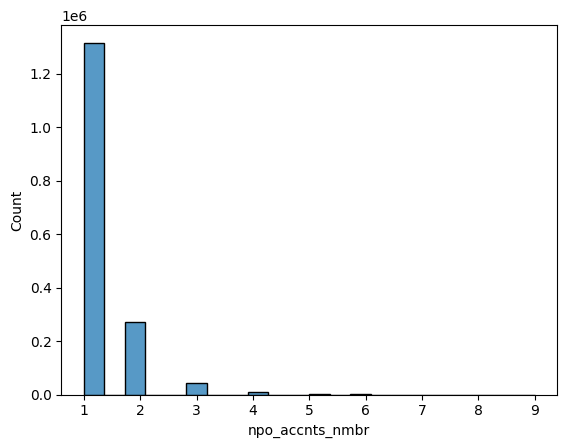

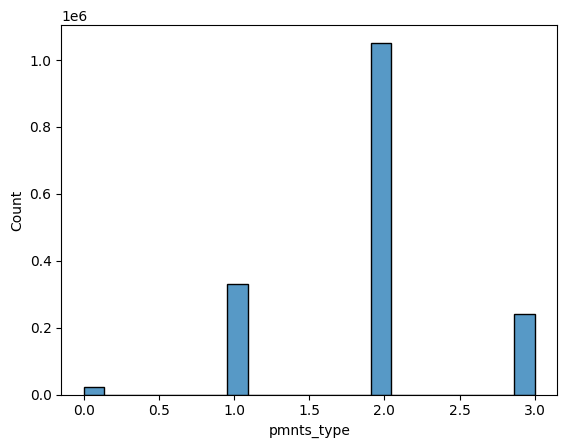

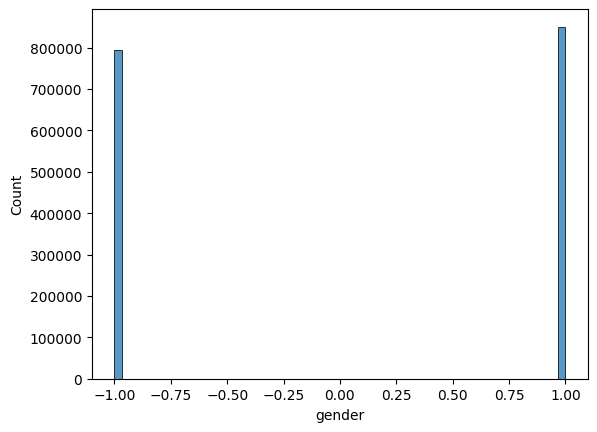

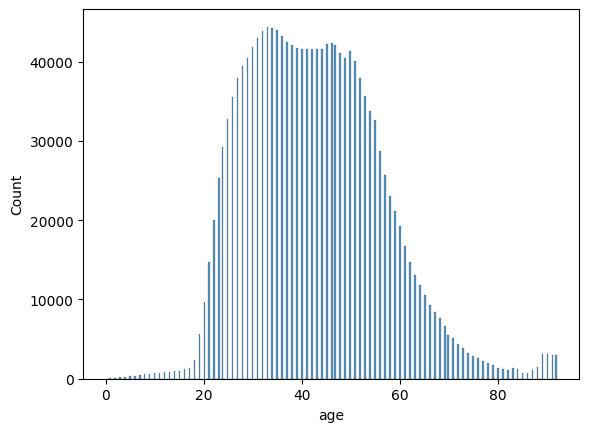

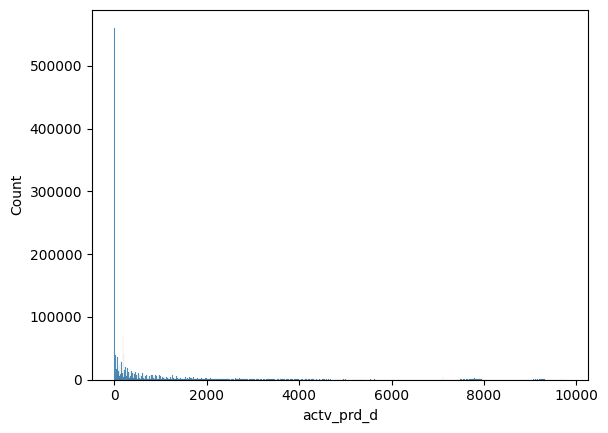

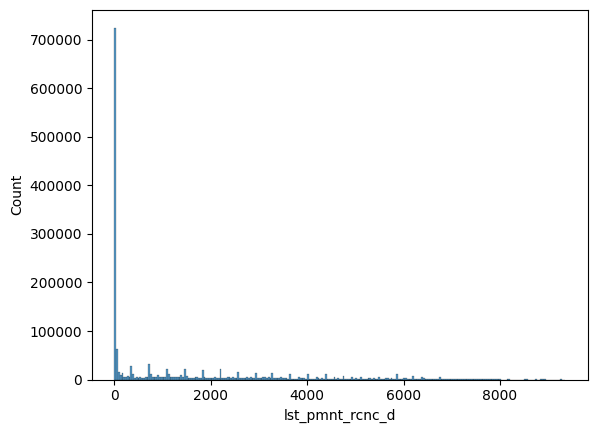

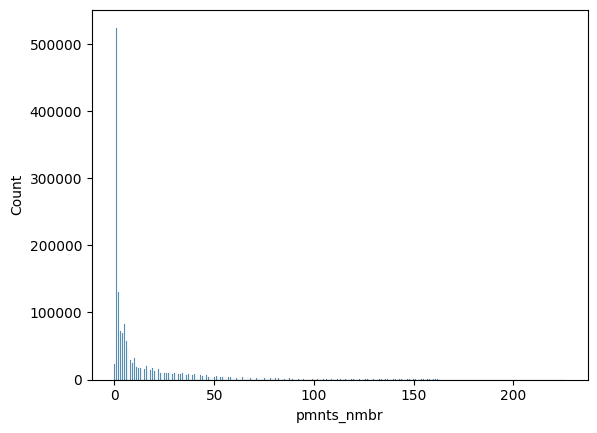

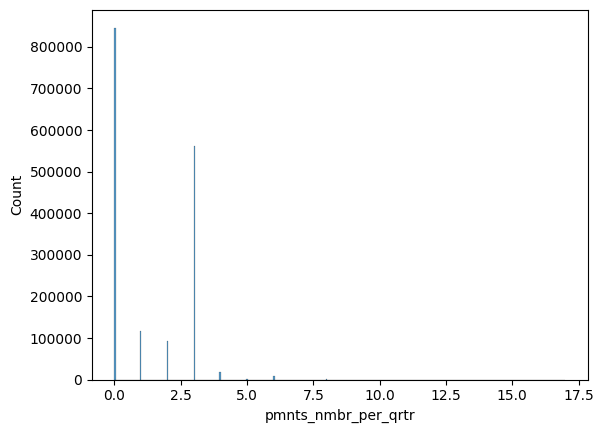

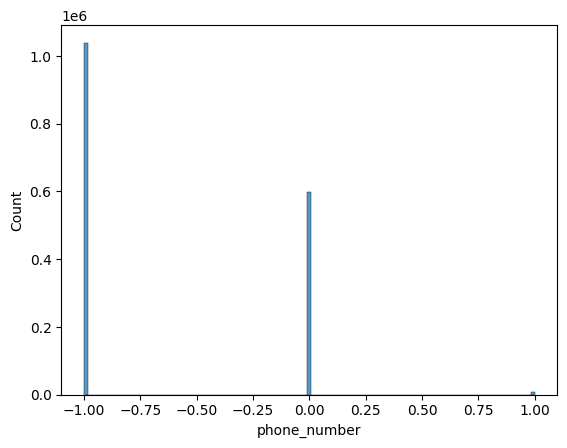

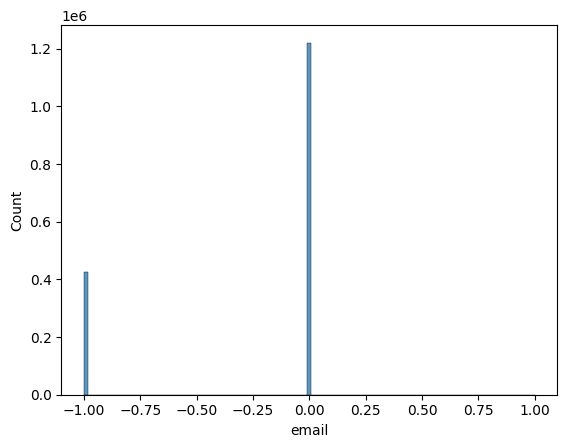

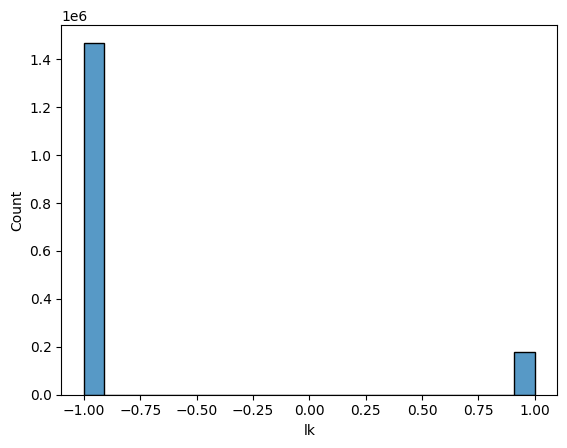

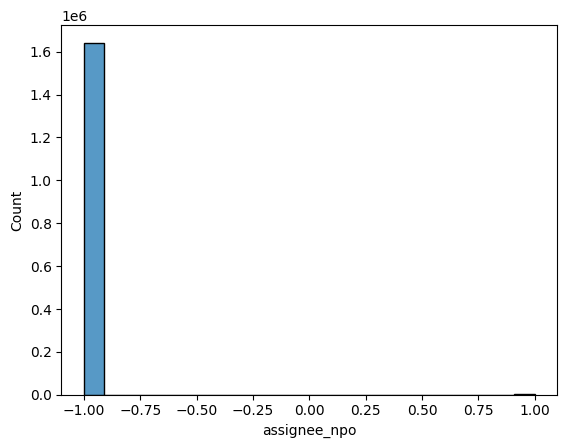

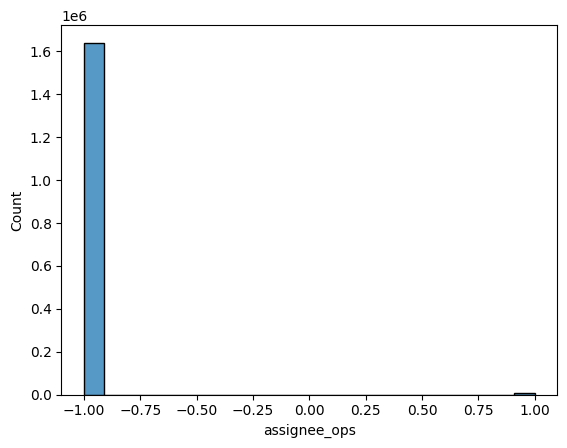

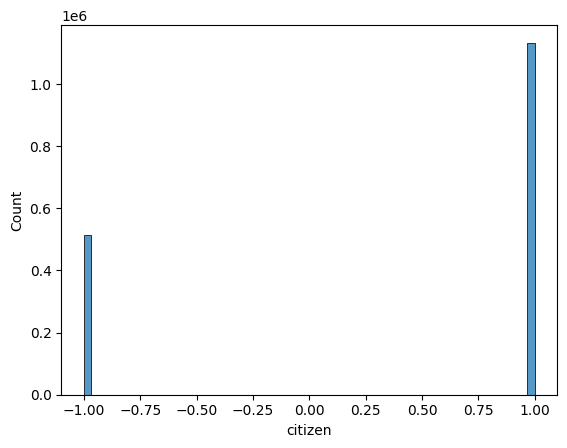

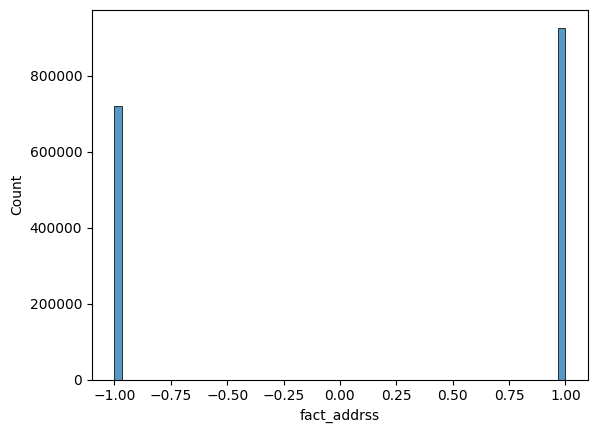

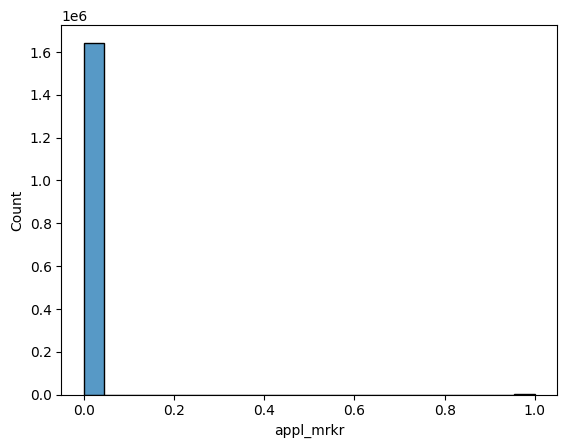

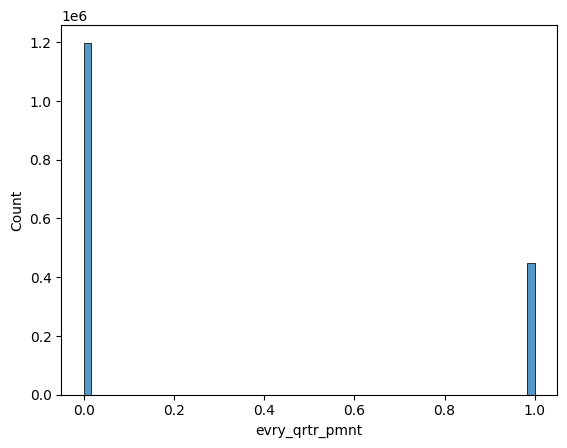

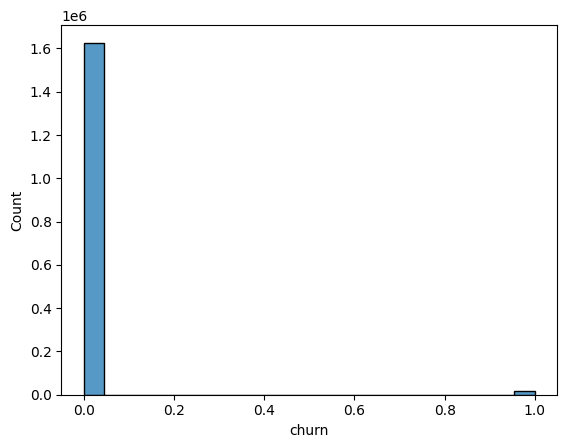

In [19]:
for col in int_cols:
    sns.histplot(buffer[col])
    plt.show()

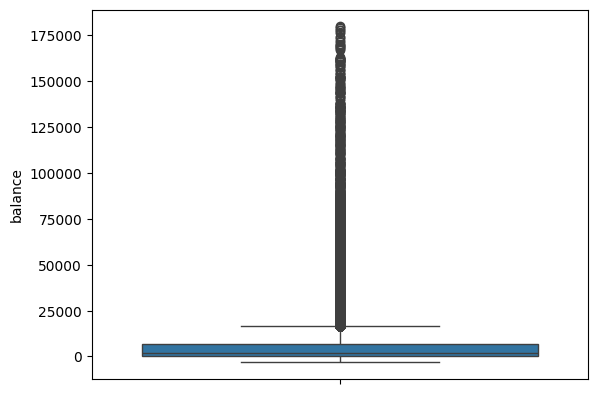

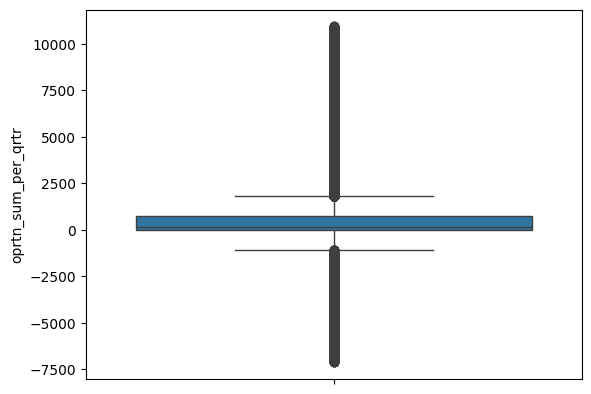

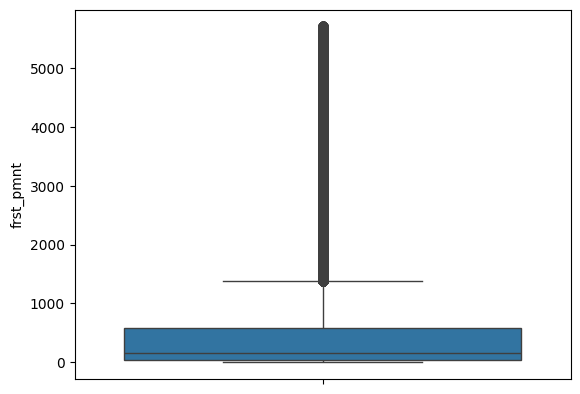

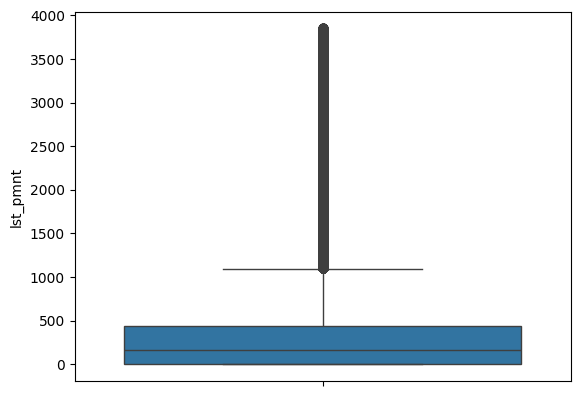

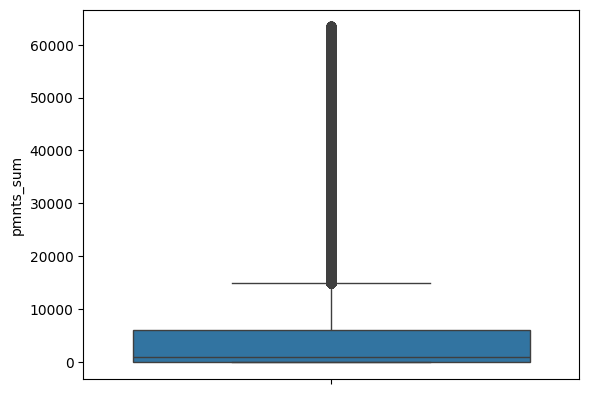

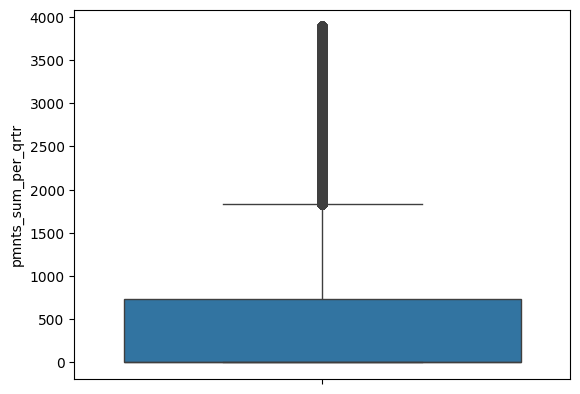

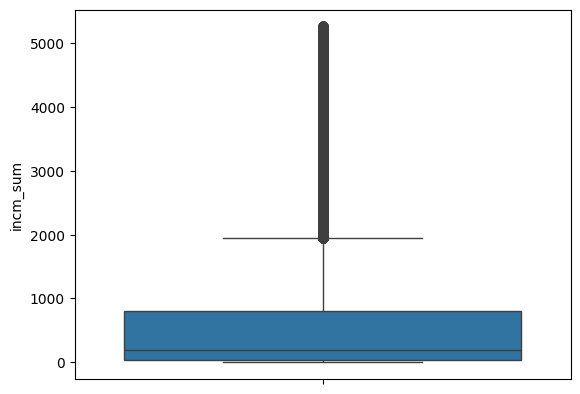

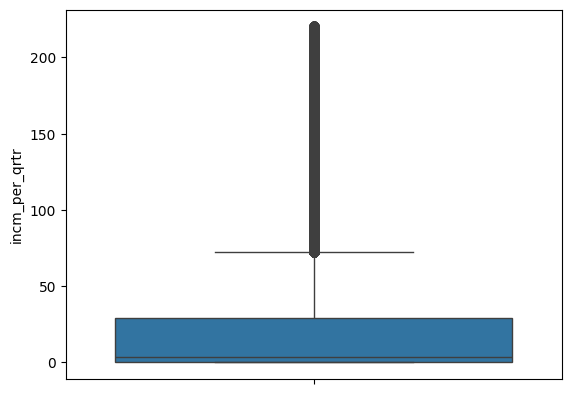

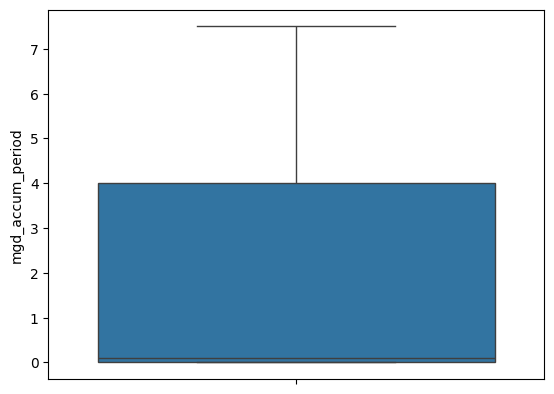

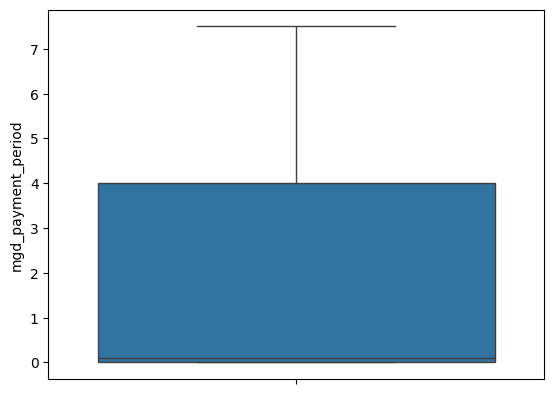

In [20]:
for col in float_cols:
    sns.boxplot(buffer[col])
    plt.show()

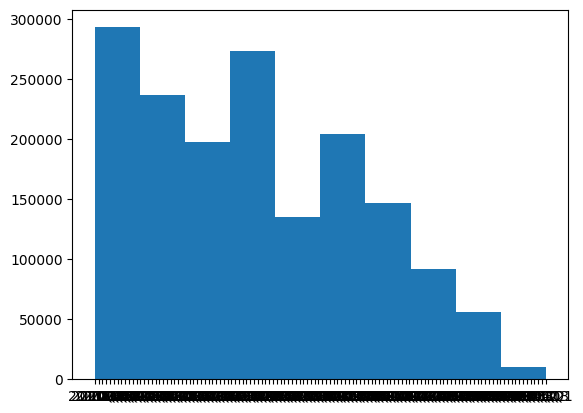

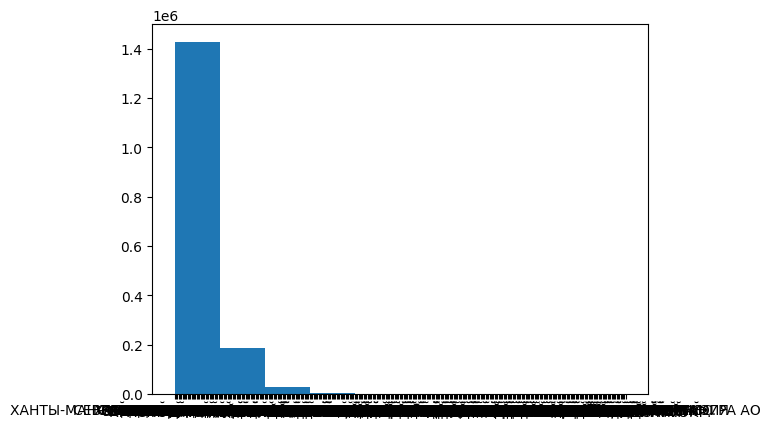

In [21]:
for col in cat_cols:
    plt.hist(buffer[col])
    plt.show()

Матрица корреляции

<Axes: >

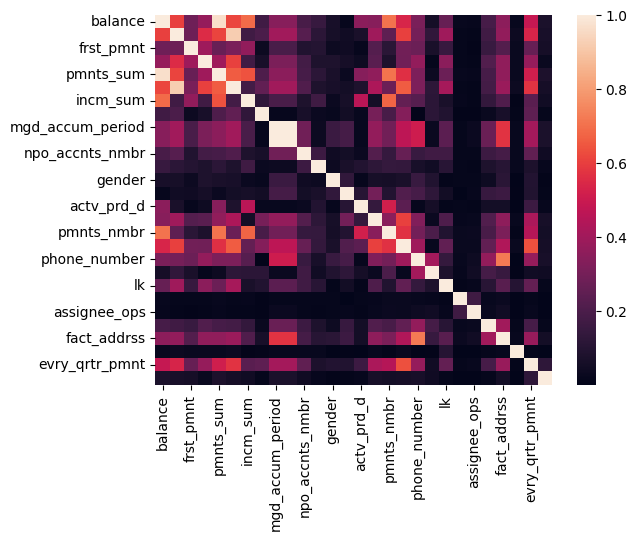

In [22]:
sns.heatmap(np.abs(buffer[float_cols + int_cols].corr()))

## Преобразование данных

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class IntegerFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, df: pd.DataFrame, y: None = None) -> BaseEstimator:
        self.dataframe = df
        # self.dataframe['actv_prd_d'] = (self.dataframe['actv_prd_d'] - self.dataframe['actv_prd_d'].mean()) / self.dataframe['actv_prd_d'].std()
        # self.dataframe['lst_pmnt_rcnc_d'] = (self.dataframe['lst_pmnt_rcnc_d'] - self.dataframe['lst_pmnt_rcnc_d'].mean()) / self.dataframe['lst_pmnt_rcnc_d'].std()
        self.dataframe['gender'] = self.dataframe['gender'].replace([1, -1], [1, 0])
        self.dataframe['has_communication'] = (self.dataframe['email'] == 1) | (self.dataframe['phone_number'] == 1)
        self.dataframe.drop(columns=['email', 'phone_number'], inplace=True)
        
        return self
    
    def transform(self, X: None = None) -> pd.DataFrame:
        return self.dataframe
    

trans = IntegerFeaturesTransformer()
trans.fit(buffer.copy())
trans.transform(buffer).head(5)

,npo_accnts_nmbr,pmnts_type,quarter,gender,age,actv_prd_d,lst_pmnt_rcnc_d,balance,oprtn_sum_per_qrtr,frst_pmnt,...,lk,assignee_npo,assignee_ops,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,has_communication
0,1,2,2017Q4,1,48,0,6757,679.37,31.34,96.25,...,-1,-1,-1,САМАРСКАЯ ОБЛ,-1,-1,0,0,0,False
2,1,1,2010Q1,1,47,1121,34,5569.85,463.41,154.47,...,-1,-1,-1,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,False
3,1,1,2005Q4,0,42,0,0,81.37,81.37,81.30,...,-1,-1,-1,СВЕРДЛОВСКАЯ ОБЛ,1,1,0,1,0,False
4,2,2,2007Q4,1,42,853,30,6937.65,794.36,198.14,...,-1,-1,-1,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,0,False
8,1,3,2021Q1,0,24,787,31,15081.77,1626.26,431.36,...,1,-1,-1,УДМУРТСКАЯ РЕСП,1,1,0,1,0,False


In [24]:
from sklearn.preprocessing import LabelEncoder


class CatFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, X: pd.DataFrame) -> BaseEstimator:
        self.dataframe = X
        self.dataframe['quarter'] = self.dataframe['quarter'].replace(r'\d{4}Q', '', regex=True)
        scaler = LabelEncoder().fit(self.dataframe['region'])
        self.dataframe['region'] = scaler.transform(self.dataframe['region'])
        return self
    
    def transform(self, X: None = None) -> np.ndarray:
        return self.dataframe


trans = CatFeaturesTransformer()
trans.fit(buffer.copy())
trans.transform(buffer)

,npo_accnts_nmbr,pmnts_type,quarter,gender,age,actv_prd_d,lst_pmnt_rcnc_d,balance,oprtn_sum_per_qrtr,frst_pmnt,...,email,lk,assignee_npo,assignee_ops,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
0,1,2,4,1,48,0,6757,679.37,31.34,96.25,...,0,-1,-1,-1,251,-1,-1,0,0,0
2,1,1,1,1,47,1121,34,5569.85,463.41,154.47,...,-1,-1,-1,-1,215,1,1,0,1,0
3,1,1,4,-1,42,0,0,81.37,81.37,81.30,...,0,-1,-1,-1,262,1,1,0,1,0
4,2,2,4,1,42,853,30,6937.65,794.36,198.14,...,0,-1,-1,-1,169,1,1,0,1,0
8,1,3,1,-1,24,787,31,15081.77,1626.26,431.36,...,0,1,-1,-1,301,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589906,2,2,2,1,27,183,30,552.28,236.59,78.86,...,0,-1,-1,-1,327,-1,-1,0,0,0
3589910,1,2,4,1,31,0,731,3080.98,118.50,1578.23,...,-1,-1,-1,-1,56,1,1,0,0,0
3589912,3,2,3,1,57,2225,30,45973.69,2407.88,562.14,...,0,-1,-1,-1,169,1,1,0,1,0
3589916,1,2,1,-1,41,0,611,59.89,13.57,40.65,...,0,-1,-1,-1,111,-1,-1,0,0,0


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


class SeparateData(BaseEstimator, TransformerMixin):
    X: np.ndarray
    y: np.ndarray 
    
    def fit(self, data: np.ndarray, y: None = None) -> BaseEstimator:
        self.X = data[:, :-1]
        self.y = data[:, -1]
        return self
    
    def transform(self, X: None = None) -> tuple[np.ndarray,
                                                 np.ndarray]:
        return self.X, self.y


transformer = ColumnTransformer(
    transformers=(
        ('int_trans', IntegerFeaturesTransformer(), int_cols),
        # ('float_trans', StandardScaler(), float_cols),
        ('cat_trans', CatFeaturesTransformer(), cat_cols)
    )
)
transformer.fit(buffer.copy())


# full_transformer = Pipeline(
#     steps=[
#         ('transformer', transformer),
#         ('separate', SeparateData())
#     ]
# )
# full_transformer.fit(train_df.copy())

X, y = transformer.transform(buffer).astype(np.float32), buffer['churn'].to_numpy(dtype=np.int16)

In [26]:
X.shape, y.shape

((1645741, 19), (1645741,))

In [27]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier


selector = RFECV(estimator=DecisionTreeClassifier(random_state=seed), cv=5, n_jobs=-1, scoring='f1', min_features_to_select=5)
selector.fit(X, y)
print(selector.support_, selector.ranking_, sep='\n')
X_selected = selector.transform(X.copy())
X_selected.shape

[False False False False False False False False False False False False
 False False  True  True  True  True  True]
[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  1  1  1  1]


(1645741, 5)

# Кросс-валидация моделей

In [28]:
len(train_df.loc[train_df['churn'] == 1]) / len(train_df)

0.01562375519440834

In [29]:
np.count_nonzero(y) / (y.size)

0.011638526353782278

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, RocCurveDisplay, precision_score, recall_score


def validate(model: BaseEstimator) -> pd.DataFrame:
    np.random.seed(seed)
    dict_ = {
        'metric': [],
        'score': []
    }
    
    cv = StratifiedKFold(n_splits=5)

    X_new = X
    y_new = y
    
    np.random.shuffle(X_new)
    np.random.shuffle(y_new)
    
    y_tests = np.empty(0)
    y_pred = np.empty(0)

    for train, test in cv.split(X_new, y_new):
        X_train, y_train = X_new[train], y_new[train]
        X_test, y_test = X_new[test], y_new[test]
        
        model.fit(X_train, y_train)
        y_pred = np.hstack((y_pred, model.predict(X_test)))
        y_tests = np.hstack((y_tests, y_test))
        
    for metric in (f1_score, precision_score, recall_score):
        dict_['metric'].append(metric.__name__)
        dict_['score'].append(metric(y_tests, y_pred))
        
    RocCurveDisplay.from_predictions(y_tests, y_pred)
        
    return pd.DataFrame(dict_)

In [31]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'catboost'

,metric,score
0,f1_score,0.002311
1,precision_score,0.014870
2,recall_score,0.001253


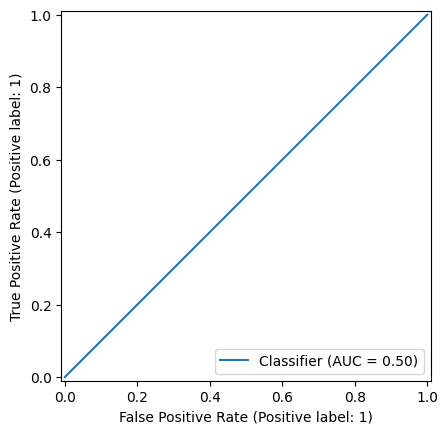

In [ ]:
validate(RandomForestClassifier(random_state=seed, n_jobs=-1))

,metric,score
0,f1_score,0.000000
1,roc_auc_score,0.499996
2,precision_score,0.000000
3,recall_score,0.000000
4,accuracy_score,0.985940


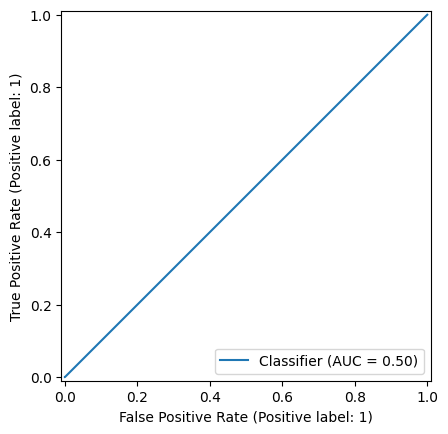

In [ ]:
validate(GradientBoostingClassifier(random_state=seed))

Learning rate set to 0.306655
0:	learn: 0.2585273	total: 153ms	remaining: 2m 33s
1:	learn: 0.1352613	total: 293ms	remaining: 2m 26s
2:	learn: 0.0968461	total: 436ms	remaining: 2m 24s
3:	learn: 0.0832123	total: 576ms	remaining: 2m 23s
4:	learn: 0.0778747	total: 708ms	remaining: 2m 20s
5:	learn: 0.0756372	total: 869ms	remaining: 2m 23s
6:	learn: 0.0746586	total: 1.01s	remaining: 2m 22s
7:	learn: 0.0742180	total: 1.15s	remaining: 2m 22s
8:	learn: 0.0740149	total: 1.29s	remaining: 2m 22s
9:	learn: 0.0739200	total: 1.42s	remaining: 2m 20s
10:	learn: 0.0738752	total: 1.56s	remaining: 2m 19s
11:	learn: 0.0738487	total: 1.7s	remaining: 2m 19s
12:	learn: 0.0738349	total: 1.85s	remaining: 2m 20s
13:	learn: 0.0738280	total: 1.99s	remaining: 2m 20s
14:	learn: 0.0738236	total: 2.14s	remaining: 2m 20s
15:	learn: 0.0738203	total: 2.28s	remaining: 2m 20s
16:	learn: 0.0738166	total: 2.42s	remaining: 2m 20s
17:	learn: 0.0738142	total: 2.56s	remaining: 2m 19s
18:	learn: 0.0738094	total: 2.7s	remaining: 2

,metric,score
0,f1_score,0.000000
1,roc_auc_score,0.499996
2,precision_score,0.000000
3,recall_score,0.000000
4,accuracy_score,0.985940


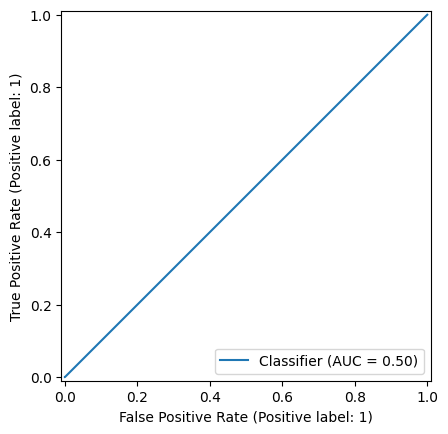

In [ ]:
validate(CatBoostClassifier(random_state=seed))

/Users/danila/Documents/Python Projects/AI Hackathon 12.04.2024/AI-Hackathon-SFD/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/danila/Documents/Python Projects/AI Hackathon 12.04.2024/AI-Hackathon-SFD/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/danila/Documents/Python Projects/AI Hackathon 12.04.2024/AI-Hackathon-SFD/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/danila/Documents/Python Projects/

,metric,score
0,f1_score,0.000000
1,roc_auc_score,0.500000
2,precision_score,0.000000
3,recall_score,0.000000
4,accuracy_score,0.985948


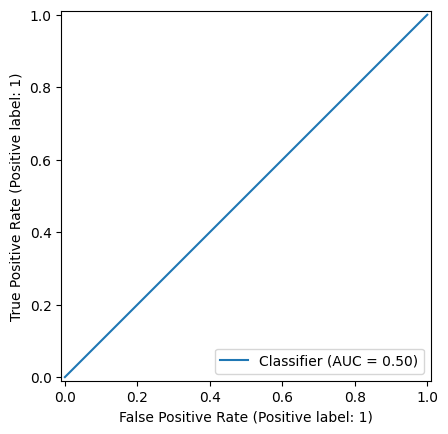

In [ ]:
validate(AdaBoostClassifier(random_state=seed))

,metric,score
0,f1_score,0.000000
1,roc_auc_score,0.500000
2,precision_score,0.000000
3,recall_score,0.000000
4,accuracy_score,0.985948


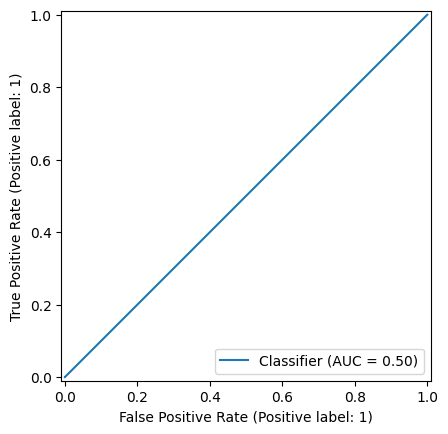

In [ ]:
validate(XGBClassifier(random_state=seed))

/Users/danila/Documents/Python Projects/AI Hackathon 12.04.2024/AI-Hackathon-SFD/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.24365e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/danila/Documents/Python Projects/AI Hackathon 12.04.2024/AI-Hackathon-SFD/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.21052e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/danila/Documents/Python Projects/AI Hackathon 12.04.2024/AI-Hackathon-SFD/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.32098e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/danila/Documents/Python Projects/AI Hackathon 12.04.2024/AI-Hackathon-SFD/.venv/l

,metric,score
0,f1_score,0.0
1,precision_score,0.0
2,recall_score,0.0


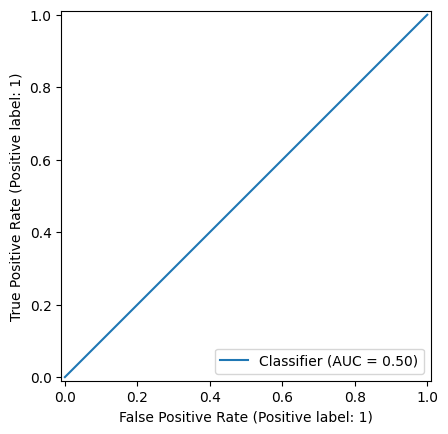

In [ ]:
validate(RidgeClassifier(random_state=seed))